# Importing Needed Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,mean_squared_error, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [4]:
# reading data
train1 = pd.read_csv('Dataset/trainn.csv')
train2 = pd.read_csv('Dataset/train.csv')
test1  = pd.read_csv('Dataset/testt.csv')
test2 = pd.read_csv('Dataset/test.csv')
Train = pd.concat([train1, train2.drop(columns = ['id'])], ignore_index=True).reset_index().rename(columns = {'index' : 'id'})
Test = pd.concat([test1.drop(columns = ['prognosis']), test2.drop(columns = ['id'])], ignore_index=True).reset_index().rename(columns = {'index' : 'id'})

In [5]:
Train

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chikungunya
1,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chikungunya
2,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chikungunya
3,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chikungunya
4,4,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chikungunya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,954,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Plague
955,955,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malaria
956,956,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
957,957,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Plague


In [6]:
Test

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,310,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,311,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
312,312,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     959 non-null    int64  
 1   sudden_fever           959 non-null    float64
 2   headache               959 non-null    float64
 3   mouth_bleed            959 non-null    float64
 4   nose_bleed             959 non-null    float64
 5   muscle_pain            959 non-null    float64
 6   joint_pain             959 non-null    float64
 7   vomiting               959 non-null    float64
 8   rash                   959 non-null    float64
 9   diarrhea               959 non-null    float64
 10  hypotension            959 non-null    float64
 11  pleural_effusion       959 non-null    float64
 12  ascites                959 non-null    float64
 13  gastro_bleeding        959 non-null    float64
 14  swelling               959 non-null    float64
 15  nausea

The train dataset has 66 features which includes 64 features with float64 datatype, 1 feature with int64 datatype  and 1 feature with an object datatype. All the features have 959 non - null values.

In [8]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     314 non-null    int64  
 1   sudden_fever           314 non-null    float64
 2   headache               314 non-null    float64
 3   mouth_bleed            314 non-null    float64
 4   nose_bleed             314 non-null    float64
 5   muscle_pain            314 non-null    float64
 6   joint_pain             314 non-null    float64
 7   vomiting               314 non-null    float64
 8   rash                   314 non-null    float64
 9   diarrhea               314 non-null    float64
 10  hypotension            314 non-null    float64
 11  pleural_effusion       314 non-null    float64
 12  ascites                314 non-null    float64
 13  gastro_bleeding        314 non-null    float64
 14  swelling               314 non-null    float64
 15  nausea

In [8]:
Train.isnull().sum()

id                0
sudden_fever      0
headache          0
mouth_bleed       0
nose_bleed        0
                 ..
ulcers            0
toenail_loss      0
speech_problem    0
bullseye_rash     0
prognosis         0
Length: 66, dtype: int64

In [9]:
[features for features in Train.columns if Train[features].isnull().sum() >= 1]

[]

There are no null values in the Train data

In [10]:
Test.isnull().sum()

id                0
sudden_fever      0
headache          0
mouth_bleed       0
nose_bleed        0
                 ..
itchiness         0
ulcers            0
toenail_loss      0
speech_problem    0
bullseye_rash     0
Length: 65, dtype: int64

In [11]:
Train.shape

(959, 66)

In [12]:
Test.shape

(314, 65)

The data is cleaned

# Exploratory Data Analysis

In [13]:
Train['prognosis'].value_counts()

prognosis
Tungiasis                93
Chikungunya              89
Dengue                   86
West_Nile_fever          85
Zika                     81
Japanese_encephalitis    81
Plague                   76
Malaria                  71
Rift_Valley_fever        70
Yellow_Fever             61
Lyme_disease             52
Rift Valley fever        23
Yellow Fever             23
Japanese encephalitis    23
West Nile fever          23
Lyme disease             22
Name: count, dtype: int64

OBSERVATION:
From the value count, we can see that the two data we merge labelled the values for the prognosis differently.
SOLUTION:
The value names with the underscore would be selected and the names without the underscore would be replaced

In [14]:
Train["prognosis"] =Train["prognosis"].replace({"Japanese encephalitis": "Japanese_encephalitis", "Yellow Fever": "Yellow_Fever", "Rift Valley fever": "Rift_Valley_fever", "West Nile fever": "West_Nile_fever", "Lyme disease" : "Lyme_disease" })
Train= Train.drop(Train[Train["prognosis"] == "Lyme_disease"].index)
Train= Train.drop(Train[Train["prognosis"] == "Lyme_disease "].index)
Train= Train.drop(Train[Train["prognosis"] == "Japanese_encephalitis"].index)
Train= Train.drop(Train[Train["prognosis"] == "Zika"].index)


In [15]:
Prognosis_count = Train['prognosis'].value_counts().reset_index()
Prognosis_count

,prognosis,count
0,West_Nile_fever,108
1,Rift_Valley_fever,93
2,Tungiasis,93
3,Chikungunya,89
4,Dengue,86
5,Yellow_Fever,84
6,Plague,76
7,Malaria,71


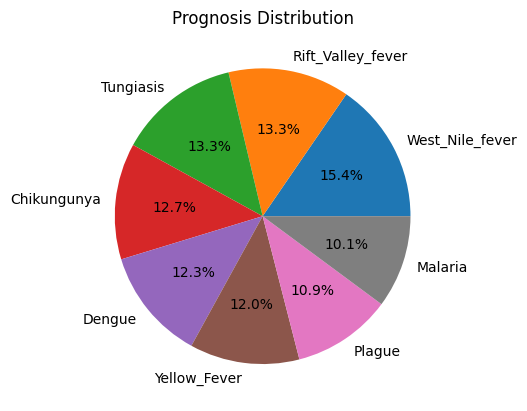

In [16]:
plt.pie(Prognosis_count['count'], labels = Prognosis_count['prognosis'], autopct='%1.1f%%')
plt.title('Prognosis Distribution')
plt.show()

OBSERVATION:
From the prognosis count table and the prognosis distrubution chart, it can be seen that the different values in the data are quite balance with Tungiasis and Rift_Valley_fever been the highest with a percentage of 13.7% followed by Chikungunya with a percentage of 13.1% and the least represented prognosis is Malaria with a percentage of 10.5%

In [17]:
Train.describe()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,479.350000,0.495714,0.468571,0.478571,0.505714,0.517143,0.465714,0.465714,0.500000,0.398571,...,0.161429,0.084286,0.105714,0.087143,0.091429,0.180000,0.172857,0.161429,0.028571,0.028571
std,283.402718,0.500339,0.499368,0.499898,0.500325,0.500063,0.499180,0.499180,0.500358,0.489954,...,0.368189,0.278014,0.307691,0.282246,0.288424,0.384462,0.378394,0.368189,0.166718,0.166718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,220.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,486.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,725.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,958.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
cols = Train.select_dtypes(include = 'number').columns
Train[cols].corr()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,symptom_count
id,1.000000,-0.063647,-0.038108,-0.000114,-0.022973,-0.004075,-0.034242,-0.063093,-5.887304e-02,-0.071169,...,-0.105052,-0.062850,-0.103221,-0.092488,0.029869,0.044099,0.049747,-0.056258,-0.066553,-0.096044
sudden_fever,-0.063647,1.000000,0.134017,0.022511,0.117253,0.180407,0.156930,0.082467,2.085791e-01,0.132448,...,0.079736,0.067996,0.098888,0.101854,-0.300906,-0.294559,-0.271926,0.035771,0.035771,0.261824
headache,-0.038108,0.134017,1.000000,0.143436,0.120965,0.225591,0.196540,0.173584,6.298169e-02,0.100972,...,0.044870,0.030965,0.054985,0.039845,-0.186588,-0.186984,-0.178561,0.062353,0.062353,0.159911
mouth_bleed,-0.000114,0.022511,0.143436,1.000000,0.186387,0.187466,0.126045,0.017117,6.577472e-02,0.067046,...,0.079924,0.051952,0.058881,0.053297,-0.121332,-0.150559,-0.148292,0.058854,0.007357,0.178025
nose_bleed,-0.022973,0.117253,0.120965,0.186387,1.000000,0.188303,0.109620,0.063795,1.600105e-01,0.086990,...,0.011960,-0.022516,-0.008597,0.026116,-0.221037,-0.228145,-0.234113,0.015191,0.049493,0.109034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ulcers,0.044099,-0.294559,-0.186984,-0.150559,-0.228145,-0.185795,-0.169288,-0.192010,-1.851246e-01,-0.186950,...,0.024498,0.002563,-0.020686,-0.027041,0.818375,1.000000,0.826278,0.080343,0.080343,-0.300143
toenail_loss,0.049747,-0.271926,-0.178561,-0.148292,-0.234113,-0.174339,-0.144980,-0.207251,-1.747247e-01,-0.182706,...,0.006649,0.000686,-0.011662,-0.044880,0.794973,0.826278,1.000000,0.087897,0.087897,-0.303678
speech_problem,-0.056258,0.035771,0.062353,0.058854,0.015191,-0.040203,0.046168,-0.005403,3.429972e-02,0.018014,...,0.040566,0.080478,0.068623,0.153858,0.075887,0.080343,0.087897,1.000000,0.279412,0.084004
bullseye_rash,-0.066553,0.035771,0.062353,0.007357,0.049493,0.062756,0.028978,0.011788,-4.185862e-17,0.035528,...,0.009701,0.024701,0.099026,0.064603,0.053567,0.080343,0.087897,0.279412,1.000000,0.084828


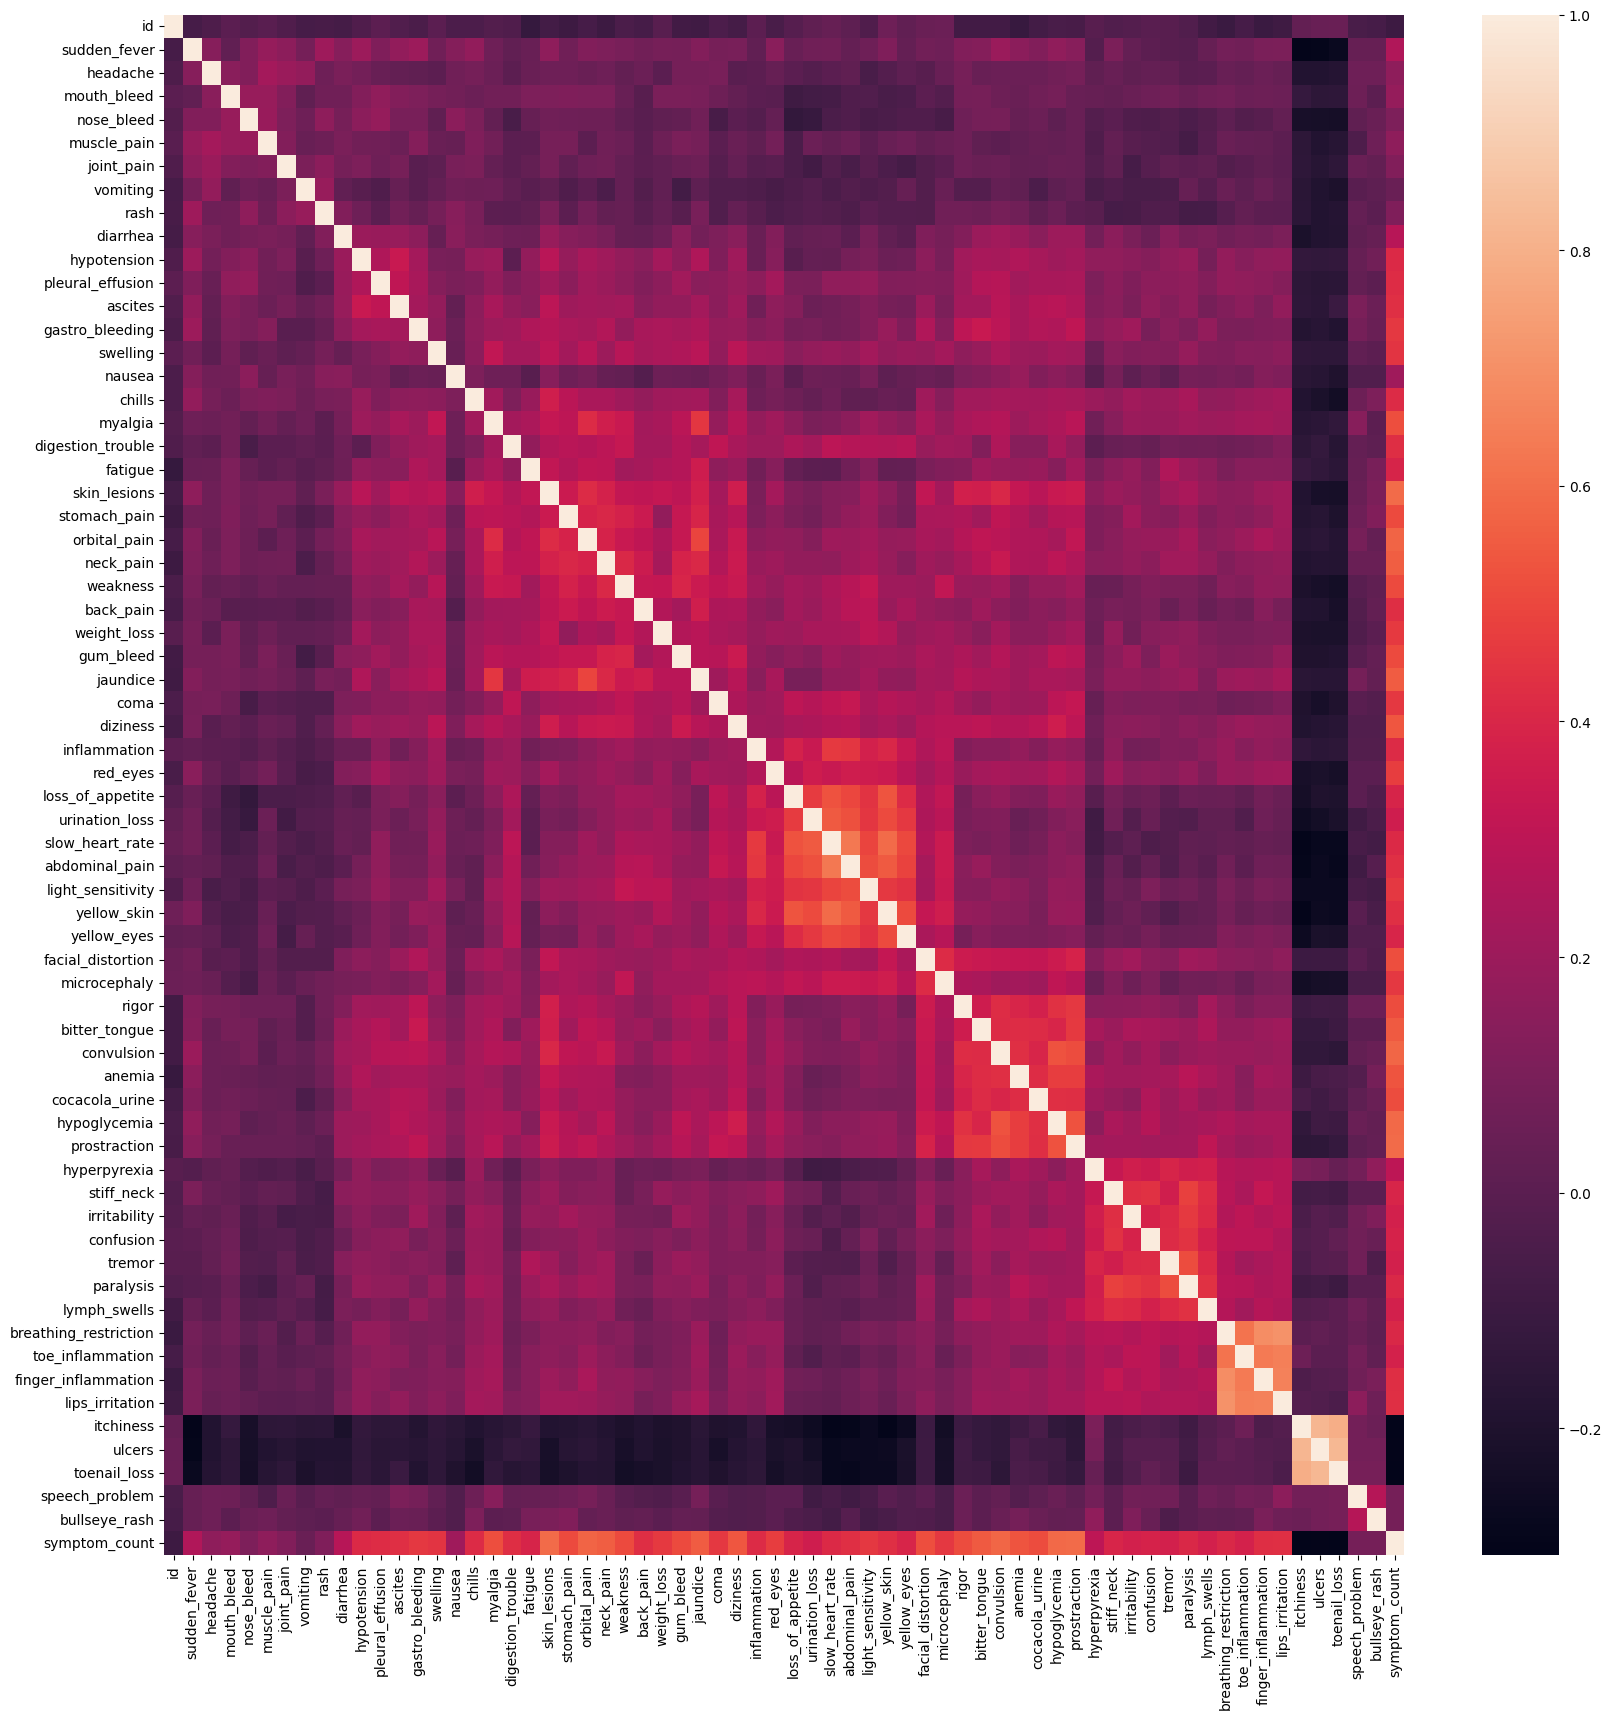

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(Train[cols].corr())
plt.show()

In [21]:
#converting prognosis to numerical data and finding the correlation
df_copy = Train.copy()
le = LabelEncoder()
df_copy['prognosis'] = le.fit_transform(df_copy['prognosis'])
df_copy = df_copy.drop(columns=['id', 'symptom_count'])
df_copy.corr()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
sudden_fever,1.000000,0.134017,0.022511,0.117253,0.180407,0.156930,0.082467,2.085791e-01,0.132448,0.202883,...,0.079736,0.067996,0.098888,0.101854,-0.300906,-0.294559,-0.271926,0.035771,0.035771,-0.133188
headache,0.134017,1.000000,0.143436,0.120965,0.225591,0.196540,0.173584,6.298169e-02,0.100972,0.077040,...,0.044870,0.030965,0.054985,0.039845,-0.186588,-0.186984,-0.178561,0.062353,0.062353,-0.096703
mouth_bleed,0.022511,0.143436,1.000000,0.186387,0.187466,0.126045,0.017117,6.577472e-02,0.067046,0.125267,...,0.079924,0.051952,0.058881,0.053297,-0.121332,-0.150559,-0.148292,0.058854,0.007357,-0.095721
nose_bleed,0.117253,0.120965,0.186387,1.000000,0.188303,0.109620,0.063795,1.600105e-01,0.086990,0.151697,...,0.011960,-0.022516,-0.008597,0.026116,-0.221037,-0.228145,-0.234113,0.015191,0.049493,-0.195407
muscle_pain,0.180407,0.225591,0.187466,0.188303,1.000000,0.122712,0.042476,5.717647e-02,0.097612,0.074843,...,0.046189,0.034694,0.024877,0.008955,-0.150015,-0.185795,-0.174339,-0.040203,0.062756,-0.090178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ulcers,-0.294559,-0.186984,-0.150559,-0.228145,-0.185795,-0.169288,-0.192010,-1.851246e-01,-0.186950,-0.135653,...,0.024498,0.002563,-0.020686,-0.027041,0.818375,1.000000,0.826278,0.080343,0.080343,0.114250
toenail_loss,-0.271926,-0.178561,-0.148292,-0.234113,-0.174339,-0.144980,-0.207251,-1.747247e-01,-0.182706,-0.130327,...,0.006649,0.000686,-0.011662,-0.044880,0.794973,0.826278,1.000000,0.087897,0.087897,0.150876
speech_problem,0.035771,0.062353,0.058854,0.015191,-0.040203,0.046168,-0.005403,3.429972e-02,0.018014,0.037624,...,0.040566,0.080478,0.068623,0.153858,0.075887,0.080343,0.087897,1.000000,0.279412,-0.023231
bullseye_rash,0.035771,0.062353,0.007357,0.049493,0.062756,0.028978,0.011788,-4.185862e-17,0.035528,0.072739,...,0.009701,0.024701,0.099026,0.064603,0.053567,0.080343,0.087897,0.279412,1.000000,-0.034369


Features positively correlated with prognosis:
prognosis                1.000000
urination_loss           0.291223
yellow_eyes              0.281736
slow_heart_rate          0.276251
loss_of_appetite         0.270665
yellow_skin              0.262285
light_sensitivity        0.259360
abdominal_pain           0.246952
weakness                 0.210134
back_pain                0.191830
coma                     0.182074
red_eyes                 0.180367
paralysis                0.179448
inflammation             0.164108
neck_pain                0.163600
jaundice                 0.155111
irritability             0.151625
digestion_trouble        0.150938
toenail_loss             0.150876
weight_loss              0.142288
stomach_pain             0.140877
gum_bleed                0.140127
diziness                 0.140000
microcephaly             0.139450
tremor                   0.132574
facial_distortion        0.122920
skin_lesions             0.121617
lymph_swells             0.120616
s

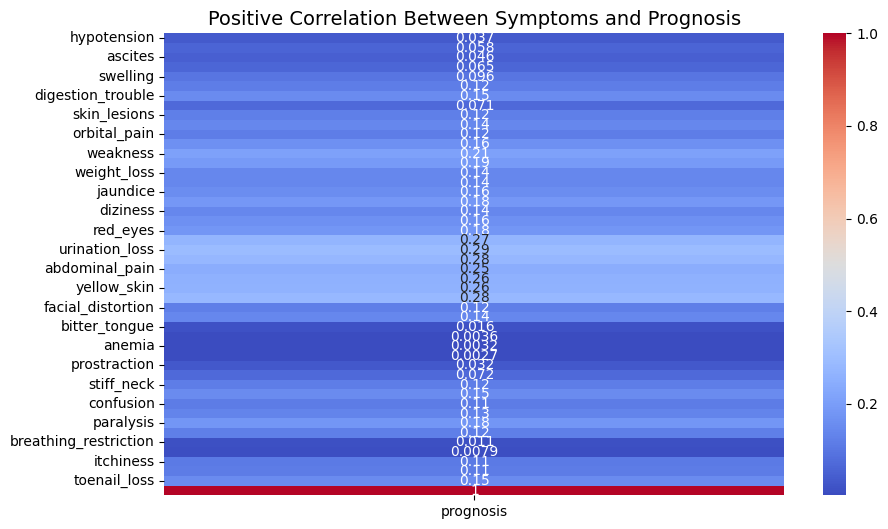

In [22]:
# Drop 'id' column if present
if 'id' in df_copy.columns:
    df_copy = df_copy.drop(columns=['id'])

# Calculate the correlation matrix between symptoms and the prognosis
correlation_matrix = df_copy.corr()

# Extract the correlation values for 'prognosis_encoded' column
prognosis_corr = correlation_matrix['prognosis']

# Filter for positive correlations (above 0)
positive_corr_features = prognosis_corr[prognosis_corr > 0].sort_values(ascending=False)

# Display the positively correlated features
print("Features positively correlated with prognosis:")
print(positive_corr_features)


# Plot a heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(prognosis_corr[prognosis_corr > 0].to_frame(), annot=True, cmap='coolwarm')
plt.title('Positive Correlation Between Symptoms and Prognosis', fontsize=14)
plt.show()


In [23]:
positive_corr = positive_corr_features.index
positive_corr = positive_corr.drop('prognosis')
positive_corr

Index(['urination_loss', 'yellow_eyes', 'slow_heart_rate', 'loss_of_appetite',
       'yellow_skin', 'light_sensitivity', 'abdominal_pain', 'weakness',
       'back_pain', 'coma', 'red_eyes', 'paralysis', 'inflammation',
       'neck_pain', 'jaundice', 'irritability', 'digestion_trouble',
       'toenail_loss', 'weight_loss', 'stomach_pain', 'gum_bleed', 'diziness',
       'microcephaly', 'tremor', 'facial_distortion', 'skin_lesions',
       'lymph_swells', 'stiff_neck', 'myalgia', 'orbital_pain', 'ulcers',
       'confusion', 'itchiness', 'swelling', 'hyperpyrexia', 'fatigue',
       'gastro_bleeding', 'pleural_effusion', 'ascites', 'hypotension',
       'prostraction', 'bitter_tongue', 'breathing_restriction',
       'finger_inflammation', 'convulsion', 'anemia', 'cocacola_urine'],
      dtype='object')

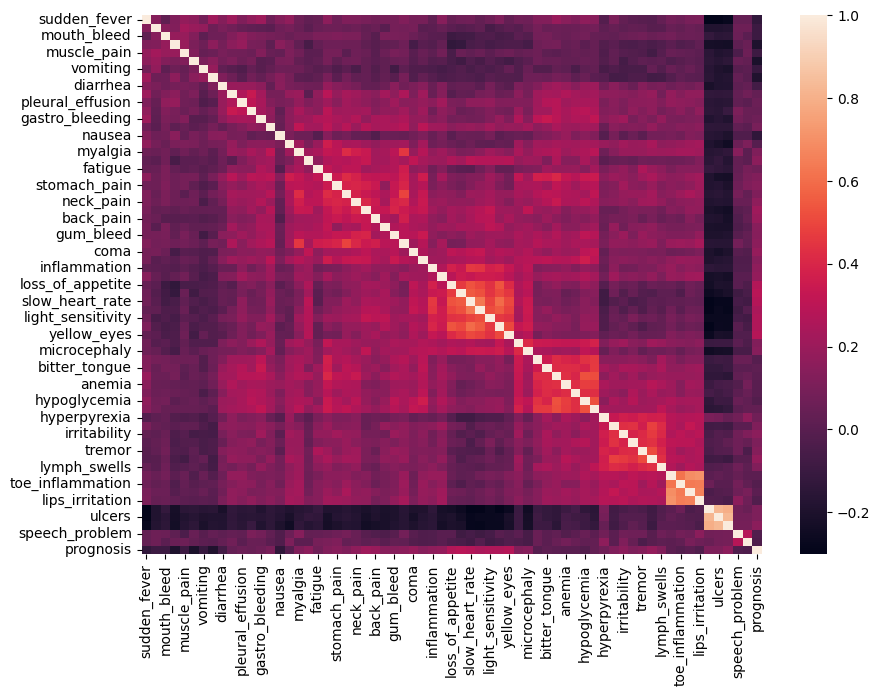

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(df_copy.corr())
plt.show()

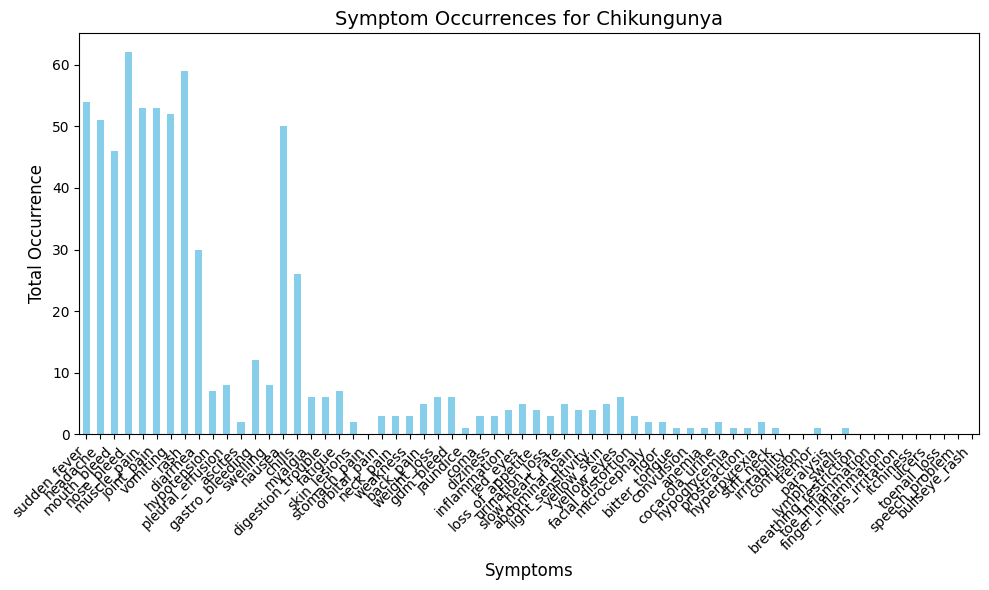

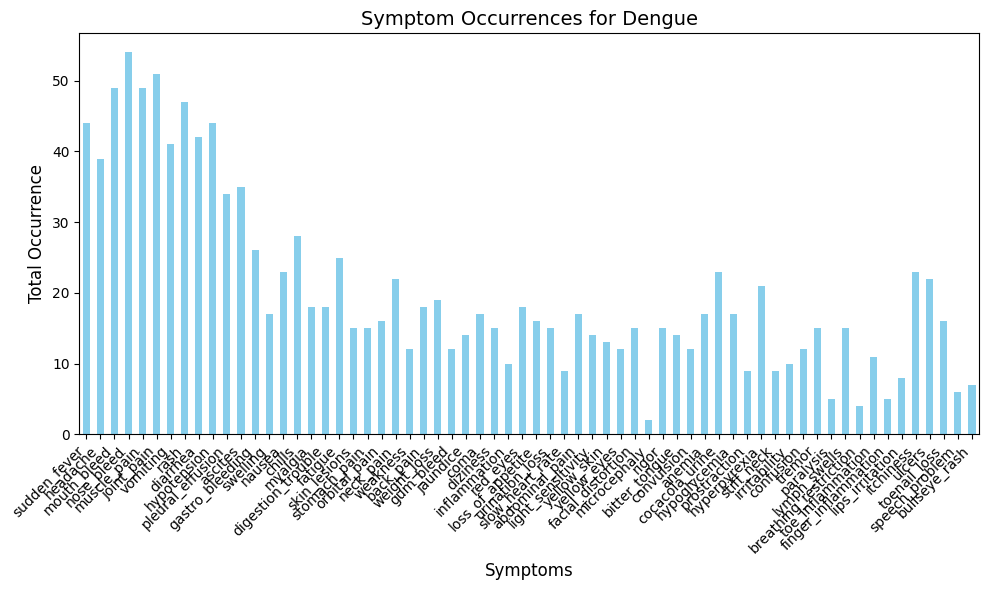

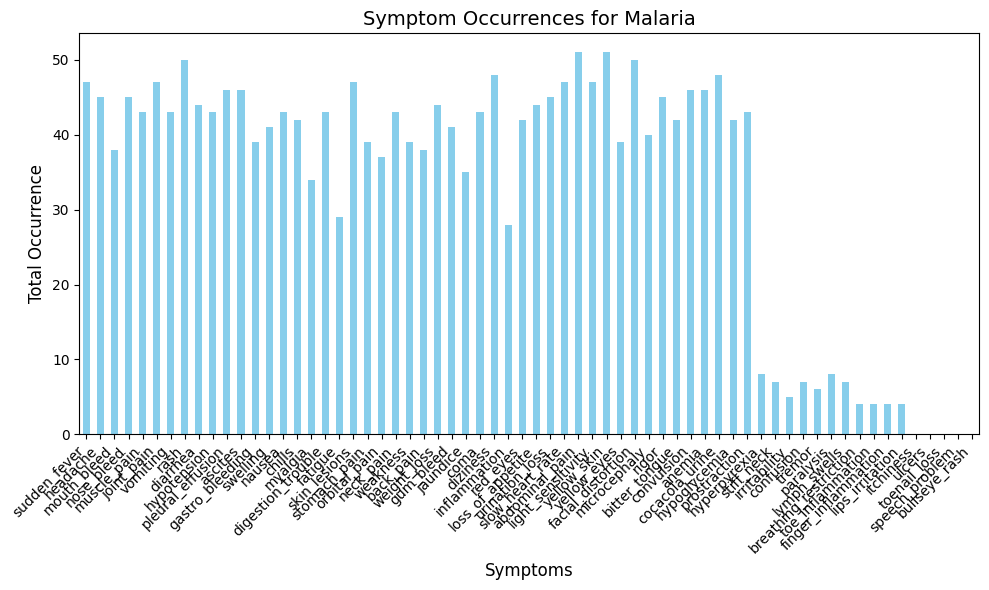

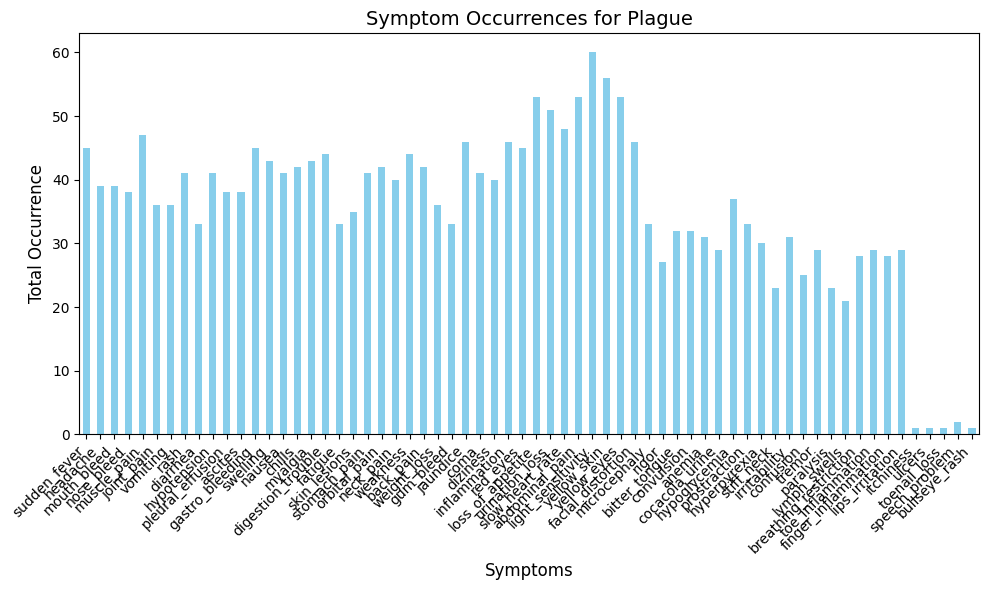

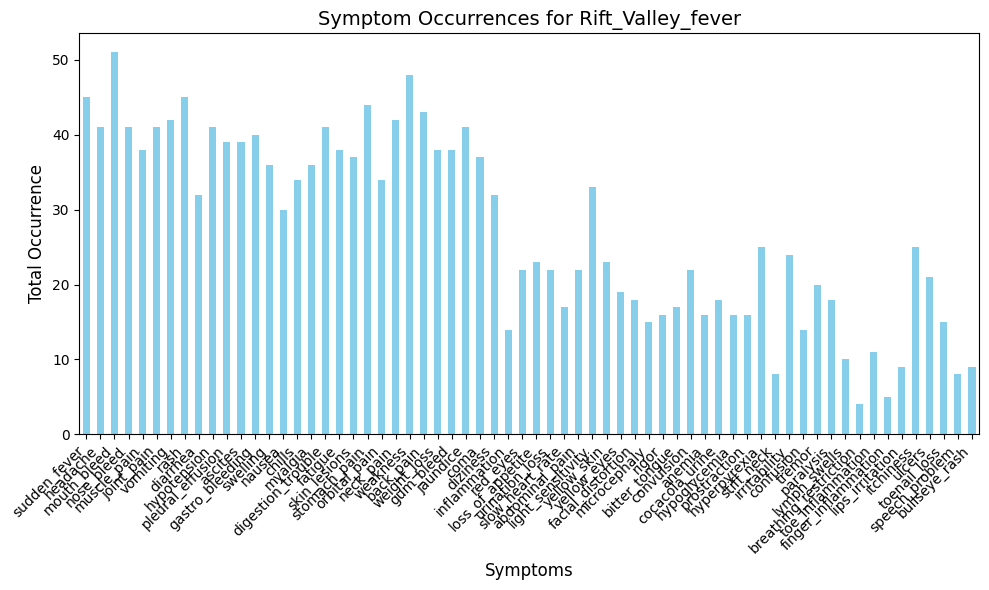

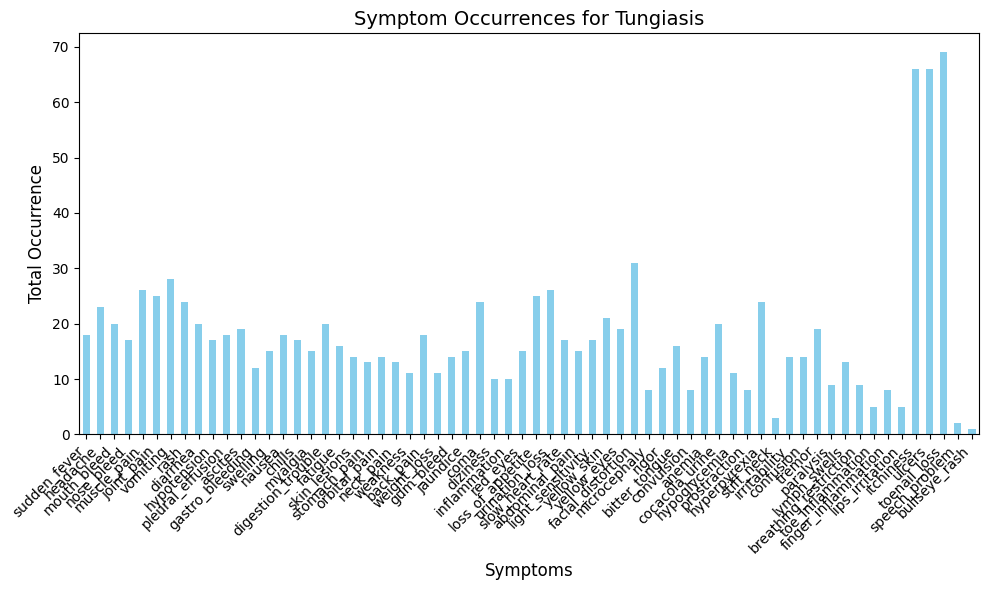

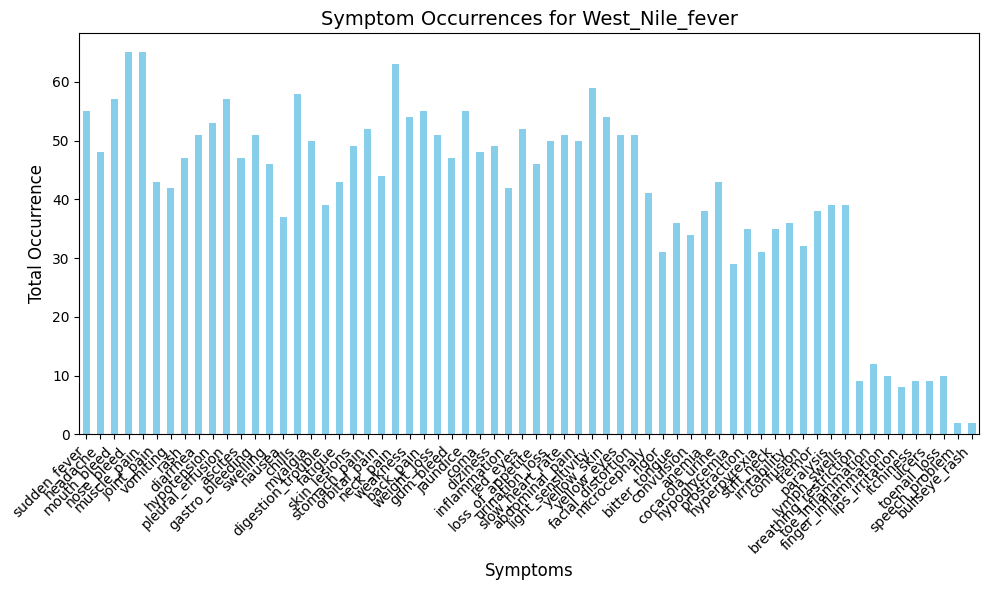

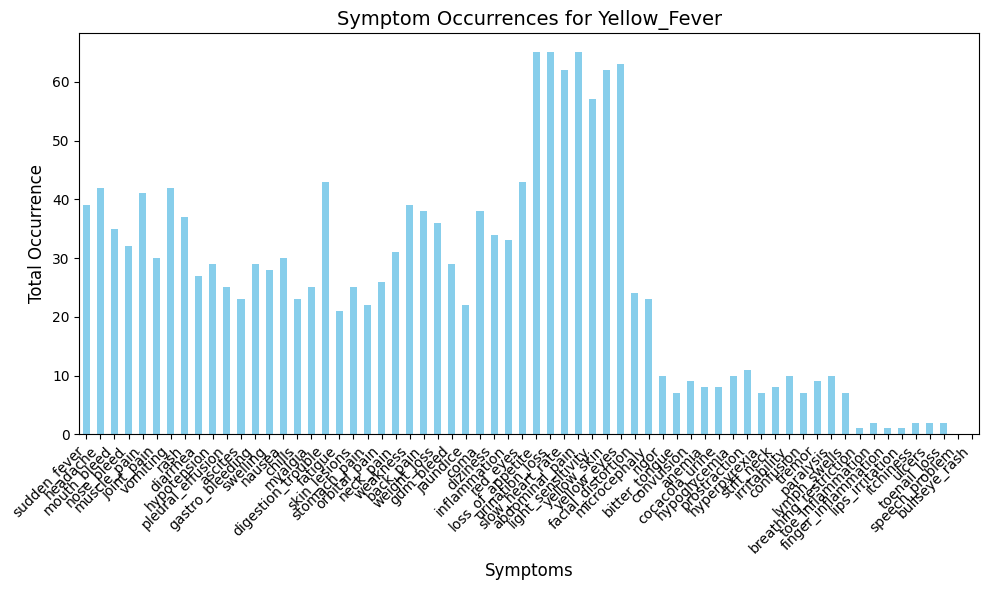

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing symptoms and prognosis
# Drop 'id' column if present and separate the prognosis column
symptom_data = Train.drop(columns=['id', 'symptom_count'])

# Group the data by prognosis and sum the symptom counts for each prognosis
grouped_symptoms = symptom_data.groupby('prognosis').sum()

# Plotting bar charts for each prognosis
for prognosis in grouped_symptoms.index:
    plt.figure(figsize=(10, 6))  # Set figure size for readability
    symptoms_for_prognosis = grouped_symptoms.loc[prognosis]
    
    # Plot a bar chart for the current prognosis
    symptoms_for_prognosis.plot(kind='bar', color='skyblue')
    
    # Add title and labels
    plt.title(f'Symptom Occurrences for {prognosis}', fontsize=14)
    plt.xlabel('Symptoms', fontsize=12)
    plt.ylabel('Total Occurrence', fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Display the bar chart
    plt.tight_layout()
    plt.show()


In [26]:
column = Train.columns
column = column.drop(['prognosis','id','symptom_count'])
column

Index(['sudden_fever', 'headache', 'mouth_bleed', 'nose_bleed', 'muscle_pain',
       'joint_pain', 'vomiting', 'rash', 'diarrhea', 'hypotension',
       'pleural_effusion', 'ascites', 'gastro_bleeding', 'swelling', 'nausea',
       'chills', 'myalgia', 'digestion_trouble', 'fatigue', 'skin_lesions',
       'stomach_pain', 'orbital_pain', 'neck_pain', 'weakness', 'back_pain',
       'weight_loss', 'gum_bleed', 'jaundice', 'coma', 'diziness',
       'inflammation', 'red_eyes', 'loss_of_appetite', 'urination_loss',
       'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin',
       'yellow_eyes', 'facial_distortion', 'microcephaly', 'rigor',
       'bitter_tongue', 'convulsion', 'anemia', 'cocacola_urine',
       'hypoglycemia', 'prostraction', 'hyperpyrexia', 'stiff_neck',
       'irritability', 'confusion', 'tremor', 'paralysis', 'lymph_swells',
       'breathing_restriction', 'toe_inflammation', 'finger_inflammation',
       'lips_irritation', 'itchiness', 'ulcers',

In [27]:
Train['prognosis'].values

array(['Chikungunya', 'Chikungunya', 'Chikungunya', 'Chikungunya',
       'Chikungunya', 'Chikungunya', 'Chikungunya', 'Chikungunya',
       'Chikungunya', 'Chikungunya', 'Chikungunya', 'Chikungunya',
       'Chikungunya', 'Chikungunya', 'Chikungunya', 'Chikungunya',
       'Chikungunya', 'Chikungunya', 'Chikungunya', 'Chikungunya',
       'Chikungunya', 'Chikungunya', 'Chikungunya', 'Dengue', 'Dengue',
       'Dengue', 'Dengue', 'Dengue', 'Dengue', 'Dengue', 'Dengue',
       'Dengue', 'Dengue', 'Dengue', 'Dengue', 'Dengue', 'Dengue',
       'Dengue', 'Dengue', 'Dengue', 'Dengue', 'Dengue', 'Dengue',
       'Dengue', 'Dengue', 'Dengue', 'Rift_Valley_fever',
       'Rift_Valley_fever', 'Rift_Valley_fever', 'Rift_Valley_fever',
       'Rift_Valley_fever', 'Rift_Valley_fever', 'Rift_Valley_fever',
       'Rift_Valley_fever', 'Rift_Valley_fever', 'Rift_Valley_fever',
       'Rift_Valley_fever', 'Rift_Valley_fever', 'Rift_Valley_fever',
       'Rift_Valley_fever', 'Rift_Valley_fever', 'Rift

In [28]:
X = Train[column]
y = Train['prognosis']


le = LabelEncoder()
y = le.fit_transform(y)

In [29]:
X_train, X_validate, y_train,y_Validate = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [31]:
y_pred = knn.predict(X_validate)

In [32]:
pd.DataFrame(y_pred, y_Validate).reset_index()

,index,0
0,3,3
1,6,7
2,5,5
3,3,3
4,6,3
...,...,...
135,1,1
136,0,0
137,1,5
138,1,2


In [33]:
print(classification_report(y_Validate, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.94      0.58        17
           1       0.33      0.12      0.18        24
           2       0.30      0.70      0.42        10
           3       0.39      0.54      0.45        13
           4       0.44      0.25      0.32        16
           5       0.57      0.67      0.62        18
           6       0.33      0.10      0.15        21
           7       0.56      0.43      0.49        21

    accuracy                           0.43       140
   macro avg       0.42      0.47      0.40       140
weighted avg       0.42      0.43      0.38       140



In [34]:
#creating models from the balanced dataset and looping each model over the dataset
models = {
    "Naive Bayes" : GaussianNB(),
    "Support Vector Machine":SVC(),
    "Random Forest":RandomForestClassifier(),
    "KNearest Neighbor":KNeighborsClassifier(),
    "Multilayer Perception":MLPClassifier(),
    "DecisionTree Classifier" : DecisionTreeClassifier(),
    "Naves BernoulliNB": BernoulliNB(),
    "Catboost Classifier" : CatBoostClassifier(),
    "XGBoost": XGBClassifier()}



results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validate)
    
   
    
    print(name)
    print("accuracy",accuracy_score(y_Validate, y_pred))
    print("precision",precision_score(y_Validate, y_pred, average = "weighted"))
    print("recall", recall_score(y_Validate, y_pred, average = "weighted"))
    print("f1_score",f1_score(y_Validate, y_pred, average = "weighted"))
    print()
    
    conf_matrix2 =  confusion_matrix(y_Validate, y_pred)
    acc_score2 = accuracy_score(y_Validate, y_pred)
    prec_score2 = precision_score(y_Validate, y_pred, average = "weighted")
    re_score2 = recall_score(y_Validate, y_pred, average = "weighted")
    f1_score2 = f1_score(y_Validate, y_pred, average = "weighted")
    results[name] =[conf_matrix2,acc_score2, prec_score2,re_score2,f1_score2]
models2 = pd.DataFrame.from_dict(results)
models2["label"] = ["conf_matrix2","acc_score2","prec_score2","re_score2","f1_score2"]


Naive Bayes
accuracy 0.38571428571428573
precision 0.3933807462378891
recall 0.38571428571428573
f1_score 0.3334171311795707

Support Vector Machine
accuracy 0.5642857142857143
precision 0.5882086167800454
recall 0.5642857142857143
f1_score 0.5484294915305369



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest
accuracy 0.5785714285714286
precision 0.6055828072855937
recall 0.5785714285714286
f1_score 0.5651799893179204

KNearest Neighbor
accuracy 0.42857142857142855
precision 0.4247589567863758
recall 0.42857142857142855
f1_score 0.38494419887968273



c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multilayer Perception
accuracy 0.4714285714285714
precision 0.4697977310046276
recall 0.4714285714285714
f1_score 0.4590720696735734

DecisionTree Classifier
accuracy 0.2857142857142857
precision 0.2607478114543572
recall 0.2857142857142857
f1_score 0.2691737356619367

Naves BernoulliNB
accuracy 0.55
precision 0.5695728102307049
recall 0.55
f1_score 0.5179585586968177

Learning rate set to 0.076821
0:	learn: 2.0357342	total: 162ms	remaining: 2m 41s
1:	learn: 1.9896842	total: 185ms	remaining: 1m 32s
2:	learn: 1.9507960	total: 206ms	remaining: 1m 8s
3:	learn: 1.9142087	total: 229ms	remaining: 57s
4:	learn: 1.8720724	total: 250ms	remaining: 49.8s
5:	learn: 1.8439633	total: 276ms	remaining: 45.8s
6:	learn: 1.8072074	total: 294ms	remaining: 41.7s
7:	learn: 1.7756792	total: 311ms	remaining: 38.6s
8:	learn: 1.7466651	total: 331ms	remaining: 36.4s
9:	learn: 1.7181467	total: 350ms	remaining: 34.7s
10:	learn: 1.6935211	total: 369ms	remaining: 33.2s
11:	learn: 1.6705546	total: 388ms	remaining: 32

In [35]:

# Define the parameter grid for tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier()

# Initialize GridSearchCV
rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, cv=15, scoring='accuracy', verbose=1)

# Fit the model
rf_grid.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", rf_grid.best_params_)
print("Best accuracy: ", rf_grid.best_score_)


Fitting 15 folds for each of 288 candidates, totalling 4320 fits


KeyboardInterrupt: 

In [36]:


# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_validate)

# Parameter grid for tuning
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001],
}

# Initialize MLP with higher max_iter and early stopping
mlp = MLPClassifier(max_iter=1000, early_stopping=True)

# GridSearchCV
mlp_grid = GridSearchCV(mlp, param_grid=mlp_param_grid, cv=10, scoring='accuracy', verbose=1)
mlp_grid.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print("Best parameters found: ", mlp_grid.best_params_)
print("Best accuracy: ", mlp_grid.best_score_)


Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best accuracy:  0.4928571428571429


In [37]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
bnb_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

# Initialize BernoulliNB Classifier
bnb = BernoulliNB()

# Initialize GridSearchCV
bnb_grid = GridSearchCV(bnb, param_grid=bnb_param_grid, cv=10, scoring='accuracy', verbose=1)

# Fit the model
bnb_grid.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", bnb_grid.best_params_)
print("Best accuracy: ", bnb_grid.best_score_)


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best parameters found:  {'alpha': 0.1, 'fit_prior': True}
Best accuracy:  0.5321428571428573


In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7, 9],        # Depth of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size
    'subsample': [0.6, 0.8, 1.0],     # Fraction of samples used for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features for each tree
    'gamma': [0, 0.1, 0.3, 0.5],      # Minimum loss reduction required for split
    'min_child_weight': [1, 3, 5],     # Minimum sum of instance weights in a child node
    'reg_alpha': [0, 0.01, 0.1, 1],    # L1 regularization (Lasso)
    'reg_lambda': [1, 0.1, 0.01]       # L2 regularization (Ridge)
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='accuracy', cv=10, verbose=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Hyperparameters: ", grid_search.best_params_)
best_xgb = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Fitting 10 folds for each of 62208 candidates, totalling 622080 fits


KeyboardInterrupt: 

In [ ]:

import numpy as np

# Define the model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter distribution
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),       # Large range for number of trees
    'max_depth': np.arange(3, 10),                   # Maximum tree depth
    'learning_rate': np.linspace(0.01, 0.3, 10),     # Learning rates
    'subsample': np.linspace(0.6, 1.0, 5),           # Subsampling rate
    'colsample_bytree': np.linspace(0.6, 1.0, 5),    # Feature subsampling
    'gamma': np.linspace(0, 0.5, 5),                 # Minimum loss reduction for split
    'min_child_weight': np.arange(1, 6),             # Minimum sum of instance weights
    'reg_alpha': np.logspace(-2, 1, 5),              # L1 regularization
    'reg_lambda': np.logspace(-2, 1, 5)              # L2 regularization
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, 
                                   n_iter=100, scoring='accuracy', cv=5, verbose=3, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and model
print("Best Hyperparameters: ", random_search.best_params_)
best_xgb = random_search.best_estimator_

# Evaluate on the test set
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# Values with only high correlation

In [11]:
X1 = df_copy[positive_corr]
y1 = df_copy['prognosis']
X1_train, X1_validate, y1_train,y1_Validate = train_test_split(X1,y1,test_size = 0.2, random_state = 42)

NameError: name 'df_copy' is not defined

In [37]:
#creating models from the balanced dataset and looping each model over the dataset
models = {
    "Naive Bayes" : GaussianNB(),
    "Support Vector Machine":SVC(),
    "Random Forest":RandomForestClassifier(),
    "KNearest Neighbor":KNeighborsClassifier(),
    "Multilayer Perception":MLPClassifier(),
    "DecisionTree Classifier" : DecisionTreeClassifier(),
    "Naves BernoulliNB": BernoulliNB(),
    "Catboost Classifier" : CatBoostClassifier(),
    "XGBoost": XGBClassifier()}



results = {}
for name, model in models.items():
    model.fit(X1_train, y1_train)
    y1_pred = model.predict(X1_validate)
    
   
    
    print(name)
    print("accuracy",accuracy_score(y1_Validate, y1_pred))
    print("precision",precision_score(y1_Validate, y1_pred, average = "weighted"))
    print("recall", recall_score(y1_Validate, y1_pred, average = "weighted"))
    print("f1_score",f1_score(y1_Validate, y1_pred, average = "weighted"))
    print()
    

Naive Bayes
accuracy 0.39285714285714285
precision 0.4711449077238551
recall 0.39285714285714285
f1_score 0.3340336989807014

Support Vector Machine
accuracy 0.5928571428571429
precision 0.6016682420409127
recall 0.5928571428571429
f1_score 0.5806781806781807

Random Forest
accuracy 0.5357142857142857
precision 0.5516228813139568
recall 0.5357142857142857
f1_score 0.5247698536984251

KNearest Neighbor
accuracy 0.40714285714285714
precision 0.4331766552774956
recall 0.40714285714285714
f1_score 0.3716790230875296



c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multilayer Perception
accuracy 0.5
precision 0.5014234175883792
recall 0.5
f1_score 0.4846333256492004

DecisionTree Classifier
accuracy 0.34285714285714286
precision 0.3376498711372661
recall 0.34285714285714286
f1_score 0.3229806547184106

Naves BernoulliNB
accuracy 0.5357142857142857
precision 0.5422833441068735
recall 0.5357142857142857
f1_score 0.4990520057521968

Learning rate set to 0.076821
0:	learn: 2.0224961	total: 16.3ms	remaining: 16.3s
1:	learn: 1.9782343	total: 29ms	remaining: 14.5s
2:	learn: 1.9285776	total: 42.2ms	remaining: 14s
3:	learn: 1.8848104	total: 54.8ms	remaining: 13.6s
4:	learn: 1.8459183	total: 66.9ms	remaining: 13.3s
5:	learn: 1.8100477	total: 81.6ms	remaining: 13.5s
6:	learn: 1.7795263	total: 98.7ms	remaining: 14s
7:	learn: 1.7432836	total: 116ms	remaining: 14.4s
8:	learn: 1.7166369	total: 133ms	remaining: 14.6s
9:	learn: 1.6893197	total: 150ms	remaining: 14.9s
10:	learn: 1.6667338	total: 164ms	remaining: 14.8s
11:	learn: 1.6422391	total: 177ms	remaining: 1

In [43]:
from sklearn.pipeline import make_pipeline

# Define the parameter grid for SVM
param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'svc__gamma': ['scale', 'auto'],  # Kernel coefficient
    'svc__degree': [2, 3, 4],  # Degree for polynomial kernel
}

# Create an SVC model
svm = SVC()

# Use a pipeline for scaling and model fitting
pipeline = make_pipeline(StandardScaler(), svm)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           cv=10, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X1_train, y1_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated accuracy: ", grid_search.best_score_)

# Store the best model
best_svm_model = grid_search.best_estimator_

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best parameters found:  {'svc__C': 1, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best cross-validated accuracy:  0.5410714285714286


In [37]:
Support_vector = SVC()
Support_vector.fit(X1_train,y1_train)
vector_pred = Support_vector.predict(X1_validate)


In [38]:
print(vector_pred)

[3 7 5 3 3 0 2 1 5 2 0 5 2 7 6 5 6 6 5 6 7 4 3 5 2 6 6 4 7 2 6 0 6 2 5 0 7
 5 5 2 5 7 6 2 1 6 2 1 7 3 7 7 6 0 4 4 1 5 7 1 1 2 1 7 7 0 0 4 6 6 7 0 7 7
 4 5 3 7 6 3 7 6 0 0 6 6 4 4 1 4 6 3 1 0 7 0 5 0 5 5 1 5 0 0 4 5 6 6 7 1 0
 6 0 2 2 7 5 0 4 3 0 7 5 7 7 7 5 0 7 1 2 0 6 7 7 1 0 5 6 2]


In [45]:
classification_report(y1_Validate, vector_pred)

'              precision    recall  f1-score   support\n\n           0       0.73      0.94      0.82        17\n           1       0.69      0.38      0.49        24\n           2       0.43      0.60      0.50        10\n           3       0.67      0.46      0.55        13\n           4       0.55      0.38      0.44        16\n           5       0.67      0.78      0.72        18\n           6       0.43      0.48      0.45        21\n           7       0.59      0.76      0.67        21\n\n    accuracy                           0.59       140\n   macro avg       0.59      0.60      0.58       140\nweighted avg       0.60      0.59      0.58       140\n'

In [51]:
Test[positive_corr]

,urination_loss,yellow_eyes,slow_heart_rate,loss_of_appetite,yellow_skin,light_sensitivity,abdominal_pain,weakness,back_pain,coma,...,pleural_effusion,ascites,hypotension,prostraction,bitter_tongue,breathing_restriction,finger_inflammation,convulsion,anemia,cocacola_urine
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
311,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
312,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [50]:
Support_vector.predict(Test[positive_corr])

array([0, 1, 4, 7, 3, 2, 6, 6, 3, 5, 6, 4, 1, 6, 4, 6, 7, 2, 0, 7, 6, 6,
       4, 4, 0, 6, 7, 7, 5, 1, 7, 6, 7, 6, 2, 4, 0, 1, 7, 7, 3, 6, 5, 3,
       3, 3, 6, 7, 7, 6, 6, 6, 0, 7, 7, 0, 4, 0, 3, 7, 5, 4, 1, 6, 7, 4,
       3, 1, 0, 1, 5, 7, 6, 2, 0, 5, 2, 6, 4, 4, 5, 5, 6, 2, 4, 7, 0, 7,
       6, 7, 2, 7, 7, 7, 6, 4, 2, 3, 0, 5, 3, 6, 0, 7, 5, 1, 0, 6, 6, 7,
       6, 6, 6, 2, 4, 5, 0, 6, 4, 7, 2, 7, 5, 7, 5, 6, 4, 6, 1, 6, 4, 6,
       0, 2, 4, 4, 7, 5, 4, 0, 5, 6, 1, 7, 3, 7, 3, 6, 5, 5, 0, 2, 6, 2,
       6, 7, 1, 1, 3, 6, 7, 0, 5, 2, 6, 1, 3, 1, 0, 7, 0, 6, 0, 7, 1, 0,
       3, 2, 0, 4, 7, 7, 7, 7, 6, 5, 6, 0, 3, 4, 5, 0, 1, 0, 1, 1, 2, 7,
       0, 0, 6, 3, 4, 6, 7, 7, 7, 7, 3, 7, 3, 4, 1, 0, 7, 3, 1, 7, 7, 2,
       5, 2, 1, 1, 3, 0, 0, 1, 4, 4, 1, 7, 7, 1, 6, 1, 6, 1, 3, 0, 3, 2,
       5, 7, 5, 3, 0, 7, 7, 1, 1, 6, 1, 5, 7, 6, 4, 6, 1, 5, 7, 2, 0, 5,
       6, 1, 7, 4, 7, 2, 6, 6, 3, 4, 5, 5, 7, 1, 3, 6, 6, 7, 7, 2, 7, 7,
       7, 5, 2, 6, 1, 4, 0, 4, 6, 4, 6, 7, 2, 4, 1,

In [44]:
confusion_matrix(y1_Validate, vector_pred)

array([[16,  0,  0,  0,  0,  0,  0,  1],
       [ 6,  9,  0,  0,  2,  4,  3,  0],
       [ 0,  0,  6,  0,  1,  0,  1,  2],
       [ 0,  1,  2,  6,  0,  0,  2,  2],
       [ 0,  1,  0,  0,  6,  2,  6,  1],
       [ 0,  1,  0,  0,  0, 14,  0,  3],
       [ 0,  1,  4,  2,  1,  1, 10,  2],
       [ 0,  0,  2,  1,  1,  0,  1, 16]], dtype=int64)

In [43]:
import joblib

# # Save the model
# joblib.dump(mlp_grid.best_estimator_, 'best_mlp_model.pkl')
joblib.dump(Support_vector, 'Support_Vector')
# joblib.dump(best_model, 'disease_prediction_model.pkl')

# # Load the model
# loaded_model = joblib.load('disease_prediction_model.pkl')

['Support_Vector']

In [10]:
logi_reg = LogisticRegression()
reg_pred = logi_reg.fit(X1_train, y1_train)

NameError: name 'X1_train' is not defined